In [108]:

import pandas as pd
import numpy as np
def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()  
    time_horizon = df['horizon'].max()  
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1): 
        data = df[df['sim'] == sim]['condition'].values
        # print(data)
        for t in range(len(data)): 
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    boo=pd.DataFrame(boo)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions = ['MTBD+tBuXPhos', 'MTBD+tBuBrettPhos', 'MTBD+AdBrettPhos']

random=get_accuracy_bandit_model(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\C–N Cross-Coupling\results\MAB\Random.csv', best_conditions)
print(random)
BayesUCBGaussian=get_accuracy_bandit_model(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\C–N Cross-Coupling\results\MAB\BayesUCBGaussian.csv', best_conditions)
print(BayesUCBGaussian)


0     0.264
1     0.258
2     0.242
3     0.262
4     0.276
5     0.256
6     0.238
7     0.254
8     0.236
9     0.210
10    0.218
11    0.252
12    0.256
13    0.262
14    0.242
15    0.244
16    0.238
17    0.238
18    0.234
19    0.234
20    0.240
21    0.226
22    0.240
23    0.236
24    0.238
25    0.226
26    0.228
27    0.224
28    0.218
29    0.230
30    0.230
31    0.222
32    0.240
33    0.248
34    0.228
35    0.238
36    0.220
37    0.234
38    0.232
39    0.232
40    0.236
41    0.254
42    0.236
43    0.236
44    0.234
45    0.230
46    0.234
47    0.244
48    0.232
49    0.224
dtype: float64
0     0.000
1     0.000
2     0.000
3     0.000
4     0.000
5     0.000
6     0.000
7     0.000
8     0.000
9     0.126
10    0.166
11    0.220
12    0.660
13    0.554
14    0.536
15    0.608
16    0.662
17    0.666
18    0.690
19    0.682
20    0.706
21    0.718
22    0.718
23    0.738
24    0.742
25    0.752
26    0.756
27    0.756
28    0.776
29    0.762
30    0.772
31    0.774
3

In [ ]:
import numpy as np
import pandas as pd
def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()
    time_horizon = df['horizon'].max()
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1):
        data = df[df['sim'] == sim]['condition'].values
        # print(data)
        for t in range(len(data)):
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    boo=pd.DataFrame(boo)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions = ['MTBD+tBuXPhos', 'MTBD+tBuBrettPhos', 'MTBD+AdBrettPhos']

encondings=['mordred','One-hot','CM','EI','Morgan'] 
models=['svm','Gaussian_process','decision_tree','random_forest','Knn']

cns=[]
path=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\C–N Cross-Coupling\results'
for model in models:
    for enconding in encondings:
        cn=get_accuracy_bandit_model(path+f'\{model}_history_500_{enconding}.csv', best_conditions)
        print(f'{model}_{enconding}',cn)
        cns.append(cn)


svm_mordred 0     0.000
1     0.000
2     0.000
3     0.000
4     0.000
5     0.000
6     0.000
7     0.000
8     0.000
9     0.108
10    0.160
11    0.294
12    0.720
13    0.614
14    0.598
15    0.606
16    0.598
17    0.644
18    0.676
19    0.680
20    0.698
21    0.700
22    0.690
23    0.722
24    0.730
25    0.726
26    0.732
27    0.746
28    0.750
29    0.772
30    0.762
31    0.758
32    0.752
33    0.776
34    0.766
35    0.776
36    0.766
37    0.770
38    0.788
39    0.796
40    0.800
41    0.808
42    0.808
43    0.822
44    0.834
45    0.840
46    0.844
47    0.846
48    0.844
49    0.840
dtype: float64
svm_One-hot 0     0.000
1     0.000
2     0.000
3     0.000
4     0.000
5     0.000
6     0.000
7     0.000
8     0.000
9     0.070
10    0.166
11    0.272
12    0.664
13    0.564
14    0.564
15    0.596
16    0.588
17    0.630
18    0.648
19    0.644
20    0.652
21    0.688
22    0.696
23    0.714
24    0.720
25    0.720
26    0.738
27    0.742
28    0.760
29    0.754
3

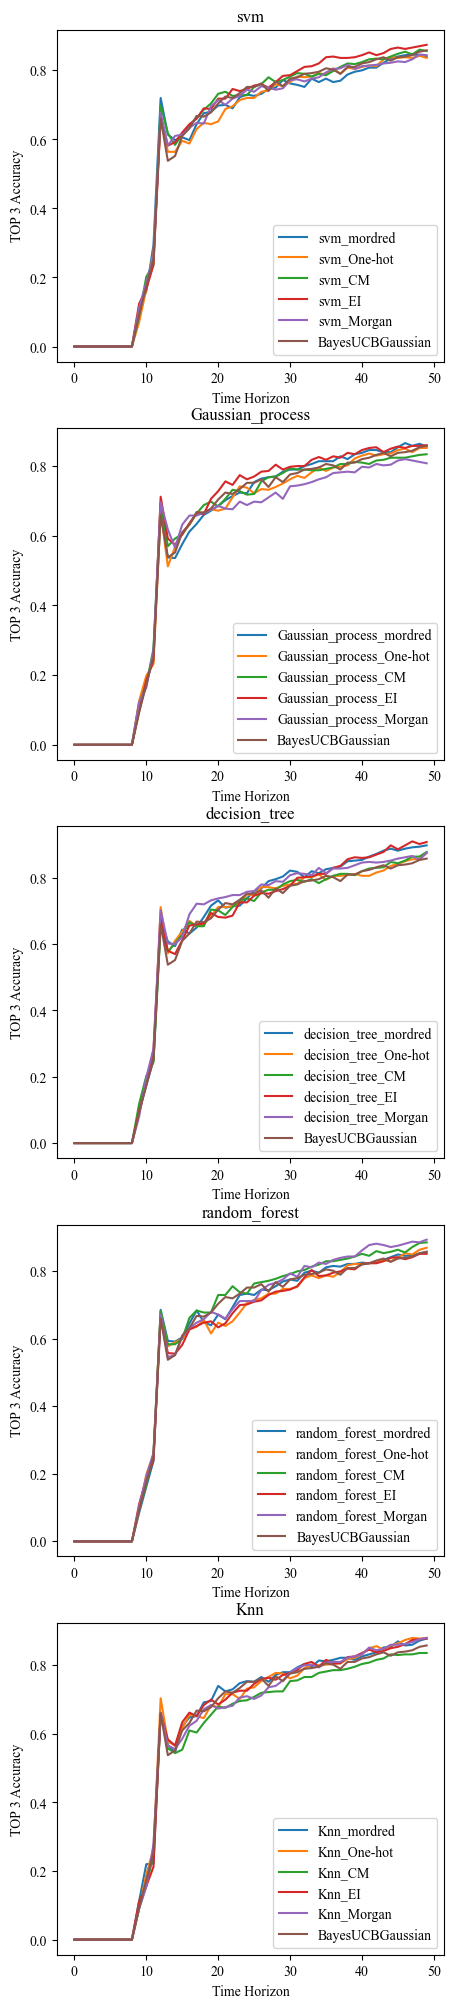

In [104]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
# import seaborn as sns
plt.figure(figsize=(5,25))
# sns.set(style='whitegrid')

for i in range(len(models)):
    plt.subplot(len(models), 1, i+1)
    for j in range(len(encondings)):
        plt.plot(cns[i*len(encondings)+j], label=f'{models[i]}_{encondings[j]}')
    plt.plot(BayesUCBGaussian, label='BayesUCBGaussian')
    plt.legend()
    plt.xlabel('Time Horizon')
    plt.ylabel('TOP 3 Accuracy')
    plt.title(f'{models[i]}')
